## 3D Raw SIM & Ground Truth volumetric pre-processing for Deep-learning Task


<br>
<br>

This notebook onverts 3D SIM stack images into cropped volummteric patchs. <br>
The intent of cropping is to fit data in to the memory of a training GPU. <br>
This code was written for python 3 on NVIDIA TITAN RTX, 32 GB RAM and Processor: Intel(R) Core(TM) i7-9700K CPU @ 3.60GHz (8 CPUs), ~3.6GHz. <br> 


@author Bereket Kebede, bkebede@memphis.edu  <br>

updated: March 2, 2023

## Overview
1. Import data
2. Setting Parameters
3. Upsample Ground Truth
4. Upsample RawSIM
5. Visualize cropped patches
6. Pre-process the RawSIM
7. Pre-process the Ground Truth

## Getting Started
---- 


In [1]:
########################################
# Setting environment

import sys
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python39/Lib/site-packages")
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python36/Lib/site-packages")
sys.path.append(r"E:\Bereket\Research\DeepLearning - 3D\custom_library")

In [2]:
########################################
# Import necessary libraries

from PIL import Image
import numpy as np
import numpy
import matplotlib.pyplot as plt
import os
import scipy.ndimage
from skimage import io
from tifffile import imsave

## 1. Import data
----

import RAW SIM and reconstructed data

Eg. (Train; 004 & 005), (Validation; is 016) (Testing; is 007)

In [4]:
########################################
# Load data into the phyton notebook

rawSIM_image_link = 'r"D:\Bereket\Research\Crawling 3D SIM Data\3D SIM Mitochondria and Lysosomes\LiveCell\
eGFP\RawSIM\20210420_H9C2-dTag_GAL_37C_1520_sim-fasterer_016.tif"'

ground_truth_image_link = r"D:\Bereket\Research\Crawling 3D SIM Data\3D SIM Mitochondria and Lysosomes\LiveCell\
eGFP\3DSIM\20210420_H9C2-dTag_GAL_37C_1520_sim-fasterer_016_SIR.tif"

In [17]:
RS_image = io.imread(r"D:\Bereket\Research\Crawling 3D SIM Data\3D SIM Mitochondria and Lysosomes\LiveCell\eGFP\RawSIM\20210420_H9C2-dTag_GAL_37C_1520_sim-fasterer_016.tif") # Wide-field image
GT_image = io.imread(r"D:\Bereket\Research\Crawling 3D SIM Data\3D SIM Mitochondria and Lysosomes\LiveCell\eGFP\3DSIM\20210420_H9C2-dTag_GAL_37C_1520_sim-fasterer_016_SIR.tif") 

print('RawSIM_image size is: ', RS_image.shape)
print('Ground-truth_image size is: ', GT_image.shape)

RawSIM_image size is:  (50, 135, 256, 256)
Ground-truth_image size is:  (50, 9, 512, 512)


Data Format <br>

data type 1: (stack, x, y) <br>
data type 2: (time, stack, x, y) <br>
data type 3: (stack, channel, x, y) <br>


Acquisition format <br>

type 1: change all phase -> change all depth -> change all orientation  <br>

In [56]:
# Hyper-paramters

data_format = "type_2"
orient = 3
phase = 5

RS_image.ndim

4

In [57]:
raw_sim_finalized = pre_process_raw(RS_image)
gt_finalized = pre_process_gt(GT_image)

NameError: name 'pre_process_raw' is not defined

In [ ]:
def pre_process_raw(RS_image, orient = 3, phase = 5):
    x_dimension = RS_image.ndim - 2
    y_dimension = RS_image.ndim - 1
    rawsim = orient*phase
    data = structure_raw(RS_image)
    temp_2 = clip_normalize_ground(data)
    temp _3 = zero_pad_raw()
    
    

In [ ]:
def pre_process_gt(input_image):
    temp_1 = clip_normalize_ground(input_image)

In [33]:
# functions

def clip_normalize_ground(GT_image, data_format = data_format):
    if (data_format == "type_2"):
        temp_GT = GT_image[slide-1].copy()
        temp_GT[temp_GT<0] = 0    #thresholding
        temp_GT = temp_GT/np.max(temp_GT)
    elif (data_format == "type_3"):
        temp_GT = GT_image[:,0,:,:].copy() # at channel 0
        temp_GT[temp_GT<0] = 0    #thresholding
        temp_GT = temp_GT/np.max(temp_GT)
    else:
        temp_GT = GT_image.copy()
        temp_GT[temp_GT<0] = 0    #thresholding
        temp_GT = temp_GT/np.max(temp_GT)
        
def clip_normalize_raw(data):
    clipped_data = data.copy() # at channel 0
    clipped_data[clipped_data<0] = 0    #thresholding

    apodized_data = clipped_data - np.min(data)
    norm_3D_data = apodized_data/np.max(apodized_data)
    return norm_3D_data

def structure_raw(total_rawsim, images_per_plane = orient*phase):
    images_per_plane = 15 
    depth = total_rawsim//images_per_plane
    data = np.zeros((images_per_plane, depth, RS_image.shape[RS_image.ndim-2], RS_image.shape[RS_image.ndim-1]))
    block = total_rawsim//3

    print(data.shape)

    for k in range(depth):
        #print('Depth %d'%(k+1))
        #print('---------------------------')
        for i in range(orient):
            for j in range(phase):
                #print(k*phase+j+i*block)
                if (data_format == "type_3"):
                    data[phase*i+j,k,:,:] = RS_image[orient*k+j+i*block,0]
                elif (data_format == "type_1"):
                    data[phase*i+j,k,:,:] = RS_image[orient*k+j+i*block]
                else:
                    data[phase*i+j,k,:,:] = RS_image[0,orient*k+j+i*block]

    # expected output:(15, 17, 1024, 1024)
def 

## Details

In [59]:
RS_image.shape[RS_image.ndim - 3]

135

Min value: 100.2
Max value: 861.2666666666667
Min value: 0.0
Max value: 1.0


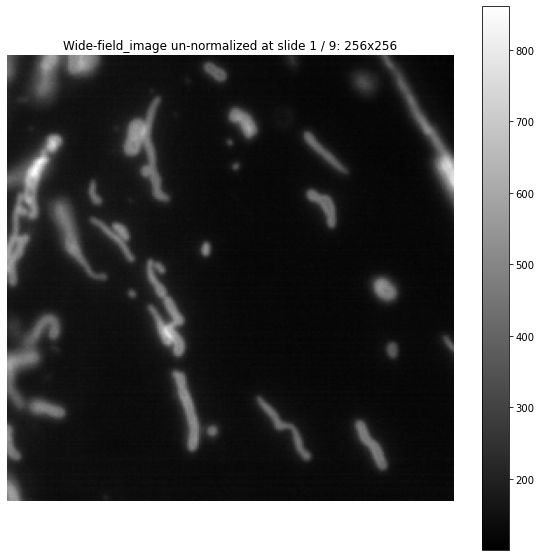

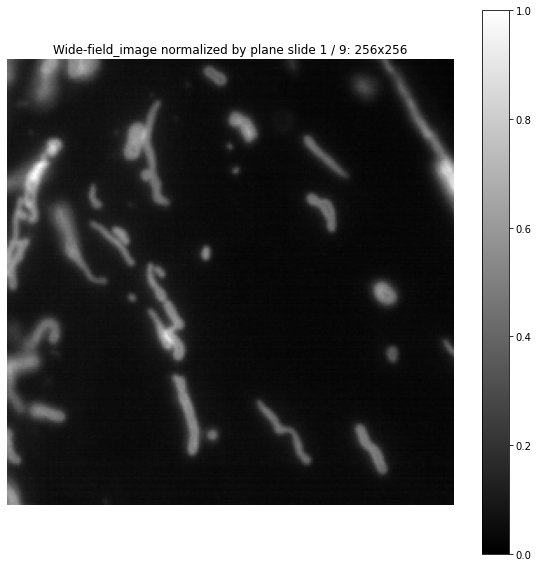

In [60]:
########################################
# wide-field

x_dimension = RS_image.ndim - 2
y_dimension = RS_image.ndim - 1

wf_sum = np.zeros([RS_image.shape[x_dimension], RS_image.shape[y_dimension]])

orient = 3
phase = 5
slide = 1

#depth = GT_image[slide-1]
rawsim = orient*phase

if (data_format == "type_3"):
    total_rawsim = RS_image.shape[RS_image.ndim - 4]
if (data_format == "type_1"):
    total_rawsim = RS_image.shape[RS_image.ndim - 3]
else:
    total_rawsim = RS_image.shape[RS_image.ndim - 3]


offset = 5*slide
jump = total_rawsim//3

for i in range(orient):
    for j in range(phase):
        hollow = i*(total_rawsim//orient)+j
        if (data_format == "type_2"):
            wf_sum += RS_image[0,hollow+offset]  # time dimension at 0
        elif (data_format == "type_3"):
             wf_sum += RS_image[hollow+offset,0]  # channel dimension at 0
        else:
             wf_sum += RS_image[hollow+offset]  # time dimension at 0
             print((hollow+offset))

wf = wf_sum/15
wf_normalized_by_plane = (wf - np.min(wf))/np.max(wf - np.min(wf))


g = plt.figure(figsize=(10,10))

plt.imshow( wf, cmap='gray')
plt.title('Wide-field_image un-normalized at slide %d / %d: %dx%d' %(slide, total_rawsim//15, RS_image.shape[x_dimension], RS_image.shape[y_dimension]) )
plt.colorbar()
plt.axis('off')
#plt.grid(b=None)

b = plt.figure(figsize=(10,10))
plt.imshow(wf_normalized_by_plane, cmap='gray')
plt.title('Wide-field_image normalized by plane slide %d / %d: %dx%d' %(slide, total_rawsim//15, RS_image.shape[x_dimension], RS_image.shape[y_dimension]) )
plt.colorbar()
plt.axis('off')

print( 'Min value:' , np.min(wf) )
print( 'Max value:' , np.max(wf) )

print( 'Min value:' , np.min(wf_normalized_by_plane) )
print( 'Max value:' , np.max(wf_normalized_by_plane) )

In [46]:
RS_image.shape

(50, 135, 256, 256)

In [47]:
GT_image.shape

(50, 9, 512, 512)

Min value: 0.0
Max value: 1.0


(-0.5, 511.5, 511.5, -0.5)

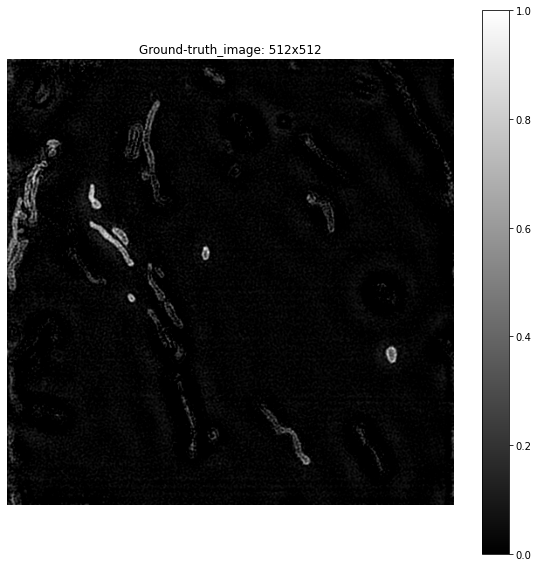

In [48]:
g = plt.figure(figsize=(10,10))

if data_format == "type_2":
    GT_ver_1 = GT_image[0,slide-1,:,:]
elif data_format == "type_3":
    GT_ver_1 = GT_image[slide-1,0,:,:] # at channel 0
else:
    GT_ver_1 = GT_image[slide-1,:,:]
    
new_min = np.min(GT_ver_1) 
new_max = np.max(GT_ver_1)

GT_ver_2 = GT_ver_1.copy()
GT_ver_2[GT_ver_2<0] = 0    #thresholding
GT_ver_3 = GT_ver_2/np.max(GT_ver_2)


print( 'Min value:' , np.min(GT_ver_3) )
print( 'Max value:' , np.max(GT_ver_3) )
plt.imshow(GT_ver_3, cmap='gray')
plt.title('Ground-truth_image: %dx%d' %(GT_image.shape[GT_image.ndim-2], GT_image.shape[GT_image.ndim-1]) )
plt.colorbar()
plt.axis('off')

## Normalizing 3D Ground Truth Stack


GT_image.shape = (20, 17, 2048, 2048) <br>
new_GT.shape = (17, 2048, 2048) <br>

In [49]:
GT_image.shape

(50, 9, 512, 512)

Min value of 3D stack point cloud: 0.0
Min value of 3D stack point cloud:: 1.0


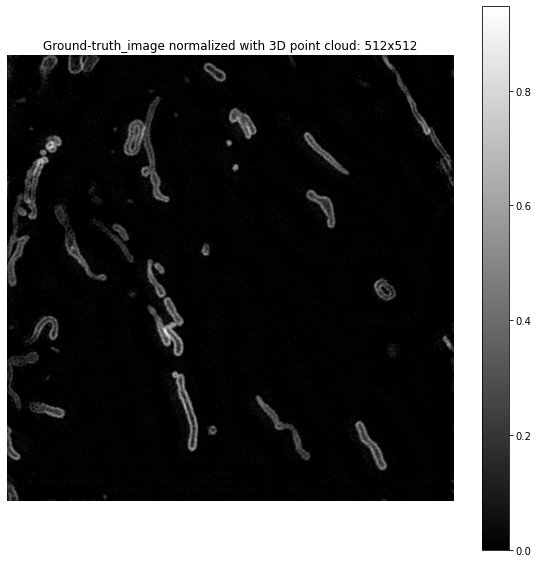

In [68]:
#temp_GT = np.empty_like(GT_image[0,:,:,:])

if (data_format == "type_2"):
    temp_GT = GT_image[slide-1].copy()
    temp_GT[temp_GT<0] = 0    #thresholding
    temp_GT = temp_GT/np.max(temp_GT)
elif (data_format == "type_3"):
    temp_GT = GT_image[:,0,:,:].copy() # at channel 0
    temp_GT[temp_GT<0] = 0    #thresholding
    temp_GT = temp_GT/np.max(temp_GT)
else:
    temp_GT = GT_image.copy()
    temp_GT[temp_GT<0] = 0    #thresholding
    temp_GT = temp_GT/np.max(temp_GT)

    
# copy -> threshold -> Normalize
g = plt.figure(figsize=(10,10))
#plt.imshow(temp_GT[10],cmap='gray', extent=[0, 1, 0, 1])
if data_format == "type_2":
    plt.imshow(temp_GT[3],cmap='gray')
else:
    plt.imshow(temp_GT[slide-1],cmap='gray')
    print("outside")
    
plt.title('Ground-truth_image normalized with 3D point cloud: %dx%d' %(GT_image.shape[GT_image.ndim-2], GT_image.shape[GT_image.ndim-1]) )
plt.colorbar()
plt.axis('off')

print( 'Min value of 3D stack point cloud:' , np.min(temp_GT) )
print( 'Min value of 3D stack point cloud::' , np.max(temp_GT) )

In [69]:
temp_GT.shape

(9, 512, 512)

In [70]:
RS_image.shape

(50, 135, 256, 256)

In [71]:
total_rawsim

135

In [72]:
images_per_plane = 15 
real_depth = total_rawsim//images_per_plane
data = np.zeros((1, images_per_plane, real_depth, RS_image.shape[RS_image.ndim-2], RS_image.shape[RS_image.ndim-1]))

print(data.shape)

for k in range(real_depth):
    for i in range(orient):
        for j in range(phase):
            if (data_format == "type_3"):
                data[0,i*j,k,:,:] = RS_image[i+j,0]
            else:
                data[0,i*j,k,:,:] = RS_image[0,i+j]

            
# expected output:(1, 15, 17, 1024, 1024)

(1, 15, 9, 256, 256)


In [73]:
RS_image.shape

(50, 135, 256, 256)

In [74]:
os.getcwd()

'D:\\Bereket\\DeepLearning - 3D\\Workspace\\Data_3D_17'

In [75]:
images_per_plane = 15 
depth = total_rawsim//images_per_plane
data = np.zeros((1, images_per_plane, depth, RS_image.shape[RS_image.ndim-2], RS_image.shape[RS_image.ndim-1]))
block = total_rawsim//3
        
print(data.shape)

for k in range(depth):
    #print('Depth %d'%(k+1))
    #print('---------------------------')
    for i in range(orient):
        for j in range(phase):
            #print(k*phase+j+i*block)
            if (data_format == "type_3"):
                data[0,phase*i+j,k,:,:] = RS_image[orient*k+j+i*block,0]
            elif (data_format == "type_1"):
                data[0,phase*i+j,k,:,:] = RS_image[orient*k+j+i*block]
            else:
                data[0,phase*i+j,k,:,:] = RS_image[0,orient*k+j+i*block]

(1, 15, 9, 256, 256)


(-0.5, 255.5, 255.5, -0.5)

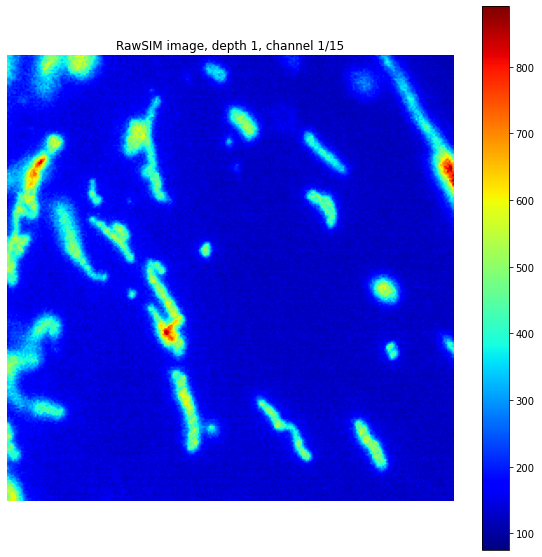

In [76]:
temp = data[0,0,0,:,:]
g = plt.figure(figsize=(10,10))
plt.imshow(temp, cmap ='jet')
plt.title('RawSIM image, depth 1, channel 1/15')
plt.colorbar()
plt.axis('off')


In [77]:
temp_GT.shape

(9, 512, 512)

In [78]:
data.shape

(1, 15, 9, 256, 256)

## Normalizing 3D Raw SIM

In [79]:
clipped_data = data.copy()
clipped_data = clipped_data - np.min(data)

In [80]:
np.max(data)

1415.0

In [81]:
clipped_data = data.copy() # at channel 0
clipped_data[clipped_data<0] = 0    #thresholding

apodized_data = clipped_data - np.min(data)
norm_3D_data = apodized_data/np.max(apodized_data)

In [82]:
norm_3D_data.shape

(1, 15, 9, 256, 256)

(-0.5, 511.5, 511.5, -0.5)

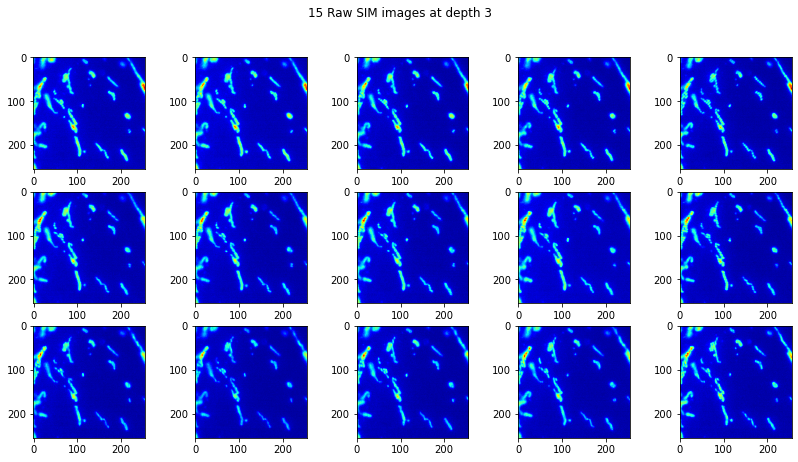

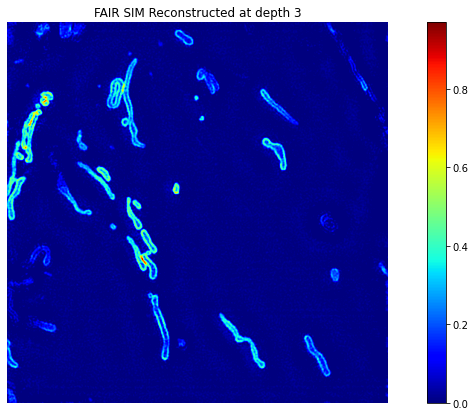

In [84]:
f = plt.figure(figsize=(14, 7))

depth = 3
plt.suptitle('15 Raw SIM images at depth %d' %depth)
for i in range(15):
    f.add_subplot(3, 5, i+1)
    plt.imshow(norm_3D_data[0,i,depth-1,:,:], cmap ='jet')
    
g =plt.figure(figsize=(14, 7))
plt.imshow(temp_GT[depth-1,:,:], cmap='jet')
plt.title('FAIR SIM Reconstructed at depth %d'%depth)
plt.colorbar()
plt.axis('off')

Text(0.5, 1.0, 'x-z plane GT at y = 100')

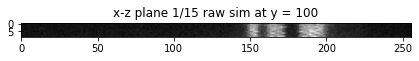

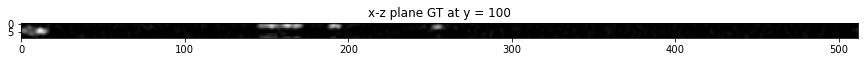

In [86]:
f = plt.figure(figsize=(7,10))

# f.add_subplot(3,5,1)
# plt.imshow(data[0,1,0,:,:])

plt.imshow(norm_3D_data[0,0,:,:,99], cmap='gray')
plt.title('x-z plane 1/15 raw sim at y = 100')

g = plt.figure(figsize=(15,20))
plt.imshow(temp_GT[:,:,99], cmap='gray')
plt.title('x-z plane GT at y = 100')

Text(0.5, 1.0, 'x-z plane GT at y = 100')

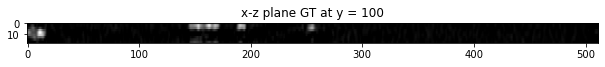

In [87]:
##########################################
# up-sample in the z-dimension 

up_sampled_GT_image = np.repeat(temp_GT,2, axis=0)
g = plt.figure(figsize=(10.24,1.1))
plt.imshow(up_sampled_GT_image[:,:,99], cmap='gray')
plt.title('x-z plane GT at y = 100')


## Cropping or Padding Input 3D Stack to 32x32x32 patchs and upsampling to 64x64x64
----

eg. 512x512x55 to 32x32x32 and upsampling to 64x64x64


## Zero padding to fill remaining Stack depth array to 32

Zero padding ground truth

In [88]:
up_sampled_GT_image.shape

(18, 512, 512)

In [89]:
# Zero padding for ground truth

wanted_z_dim = 64

if (up_sampled_GT_image.shape[0] >= wanted_z_dim):
    newer_GT = up_sampled_GT_image[0:wanted_z_dim,:,:]
    print(newer_GT.shape)
else:
    newer_GT = up_sampled_GT_image.copy()
    newer_GT.resize((wanted_z_dim,up_sampled_GT_image.shape[1], up_sampled_GT_image.shape[2]))
    newer_GT.shape

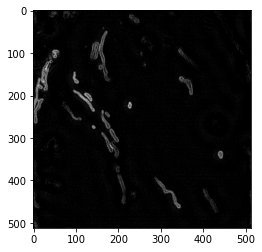

In [91]:
plt.imshow(newer_GT[3,:,:], cmap ='gray')

## Visualize patchs

(-0.5, 30.5, 30.5, -0.5)

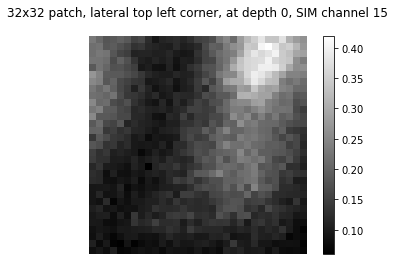

In [92]:
sim_channel =15
plt.imshow(norm_3D_data[0,sim_channel-1,0,0:31,0:31], cmap ='gray')
plt.title('32x32 patch, lateral top left corner, at depth 0, SIM channel %d' %(sim_channel), pad=20);
plt.colorbar()
plt.axis('off')

## zero padding the raw SIM



In [104]:
# Zero padding for TTV data
new_data = norm_3D_data.copy()
print(new_data.shape)
#new_data.resize((1,15,32,1024,1024))

(1, 15, 9, 256, 256)


In [105]:
new_data.shape[-3]

9

In [106]:
if (up_sampled_GT_image.shape[0] >= wanted_z_dim):
    new_data = data[:,:,0:wanted_z_dim//2,:,:]
    print(new_data.shape)
else:
    v = np.zeros([1,15,32-new_data.shape[-3],new_data.shape[3],new_data.shape[4]])
    v.shape
    new_data = np.concatenate((data, v), axis=2)
    new_data.shape

In [107]:
# for i in range(17,32):
#     for j in range(15):
#         new_data[0,j,i,:,:] = np.zeros([new_data.shape[3],new_data.shape[4]])
        
# plt.imshow(new_data[0,14,16,0:31,0:31], cmap ='gray')
# plt.title('32x32 patch, lateral top left corner, at depth 0', pad=20);
# plt.colorbar()
# plt.axis('off')

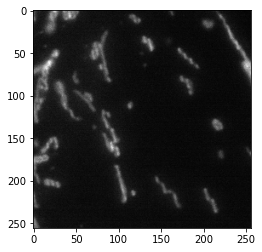

In [108]:
plt.imshow(new_data[0,10,6,:,:], cmap = 'gray')

In [109]:
new_data.shape

(1, 15, 32, 256, 256)

In [110]:
total_depth = new_data.shape[-3]

wide_field_sum = np.zeros([total_depth,RS_image.shape[x_dimension], RS_image.shape[y_dimension]])

for j in range(total_depth):
    for i in range(images_per_plane):
        wide_field_sum[j] += new_data[0,i,j]

### Generate wide-field

In [114]:
path = 'E:/Bereket/Research/DeepLearning - 3D/Data/Data_pre_processed/MDV'
wf_name = '/20210420_H9C2-dTag_GAL_37C_1520_sim-fasterer_016'
my_path = path + wf_name +'/Wide-field'

if(os.path.isdir(my_path) == False):
    os.makedirs(my_path)
imsave(my_path+'/20210420_H9C2-dTag_GAL_37C_1520_sim-fasterer_016_wf.tif',wide_field_sum)

In [116]:
#####################################################################################
# Allow Memory Growth

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

## pre-process training data

crop patch TTV data and send it to pattern illuminated folder

In [117]:
# pre-process training data

path = 'E:/Bereket/Research/DeepLearning - 3D/Data/Data_pre_processed/MDV'
raw_SIM_name = '/20210420_H9C2-dTag_GAL_37C_1520_sim-fasterer_016'
my_path = path + raw_SIM_name +'/Pattern_illuminated'

f= plt.figure(figsize=(14, 14))
count = 0
c = []
for x in range(0,data.shape[3],32):
    for y in range(0,data.shape[4],32):
        count +=1
        c = []
        for i in range(15):
            c.append(new_data[0,i,:,x:x+32,y:y+32])
            #image = scipy.ndimage.zoom(c[i], zoom = (2,2,2), order = 1)
            up_x = np.repeat(c[i],2, axis=0)
            up_y = np.repeat(up_x,2, axis=1)
            up_z = np.repeat(up_y,2, axis=2)
            if(os.path.isdir(my_path+'/Sample_%d'%(count)) == False):     
                os.makedirs(my_path+'/Sample_%d/'%(count))
            imsave(my_path+'/Sample_%d/HE_%d.tif' %(count,i+1), up_z)

<Figure size 1008x1008 with 0 Axes>

## pre-process ground truth

crop patch ground truth data and send it to reconstructed folder

In [118]:
# pre-process ground truth
# fix ground truth of 007

path = 'E:/Bereket/Research/DeepLearning - 3D/Data/Data_pre_processed/MDV'
GT_name =  '/20210420_H9C2-dTag_GAL_37C_1520_sim-fasterer_016'
my_path = path + GT_name +'/Reconstructed'


gt_list = []
count = 0
for x in range(0,newer_GT.shape[1],64):
    for y in range(0,newer_GT.shape[2],64):
        gt_list.append(newer_GT[:,x:x+64,y:y+64])
        count +=1
        if(os.path.isdir(my_path) == False):
                os.mkdir(my_path)
        imsave(my_path+'/Sample_%d.tif' %(count), gt_list[count-1])

In [119]:
newer_GT.shape

(64, 512, 512)

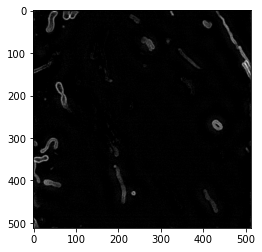

In [120]:
plt.imshow(newer_GT[10], cmap = 'gray')